Loaded C:/Users/justi/Documents/Python Files/CDKresults.txt
Number of records: 3832
Data columns: ['position', 'residue_info', 'prediction', 'score', 'probability']
Loaded C:/Users/justi/Documents/Python Files/MAPKresults.txt
Number of records: 3619
Data columns: ['position', 'residue_info', 'prediction', 'score', 'probability']

CDK Results Preview:
   position residue_info prediction     score  probability
0        11           Y-    NONPHOS -0.321344     0.420348
1        16           S-    PHOSPHO  0.486061     0.619178
2        18           T-    NONPHOS -1.094309     0.250808
3        19           Y-    NONPHOS -0.534248     0.369527
4        29           S-    NONPHOS -1.045992     0.259995

MAPK Results Preview:
   position residue_info prediction     score  probability
0        19           T-    PHOSPHO  0.026106     0.506526
1        34           T-    PHOSPHO  0.536728     0.631051
2        42           T-    PHOSPHO  0.451644     0.611030
3        44           S-    PHOSPH

C:\Users\justi\AppData\Local\Temp\ipykernel_26992\426898485.py:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='prediction', y='score', data=results, ax=axes[1, 0],
C:\Users\justi\AppData\Local\Temp\ipykernel_26992\426898485.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='prediction', y='probability', data=results, ax=axes[1, 1],
C:\Users\justi\AppData\Local\Temp\ipykernel_26992\426898485.py:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='prediction', y='score', data=results, ax=axes[1, 0],
C:\Users\justi\AppData\Local\Te

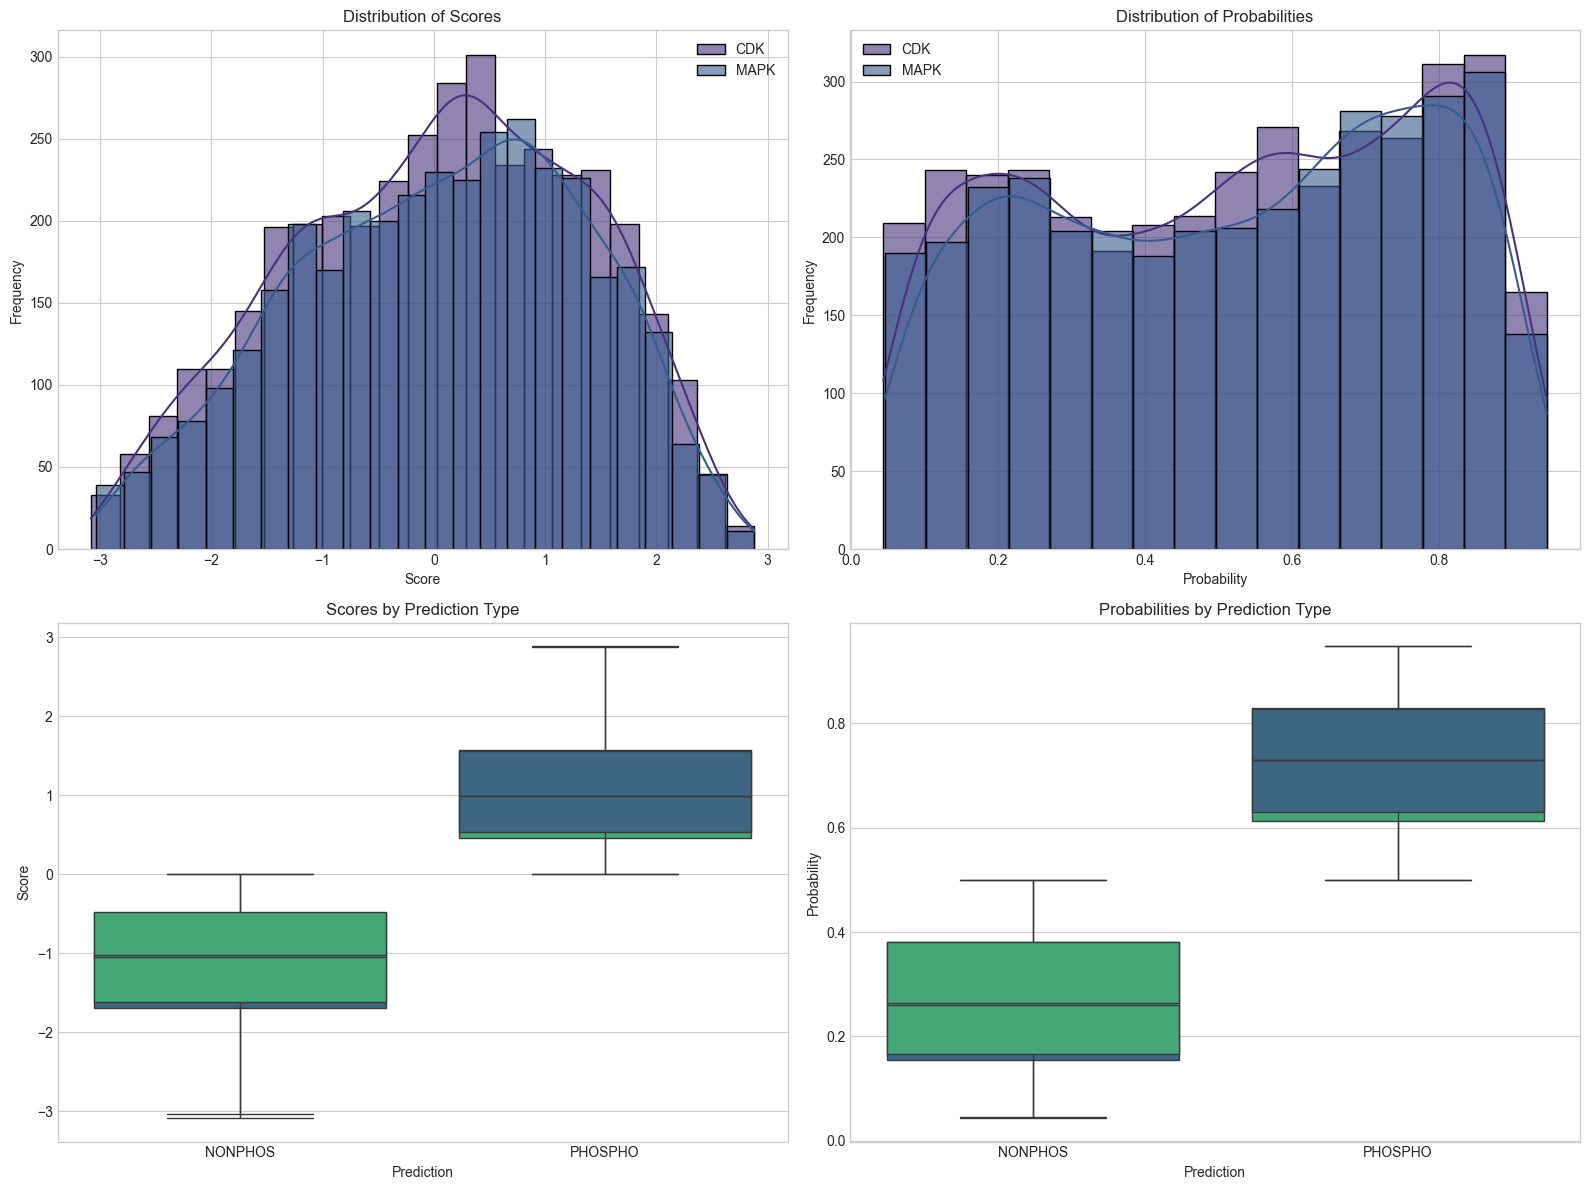

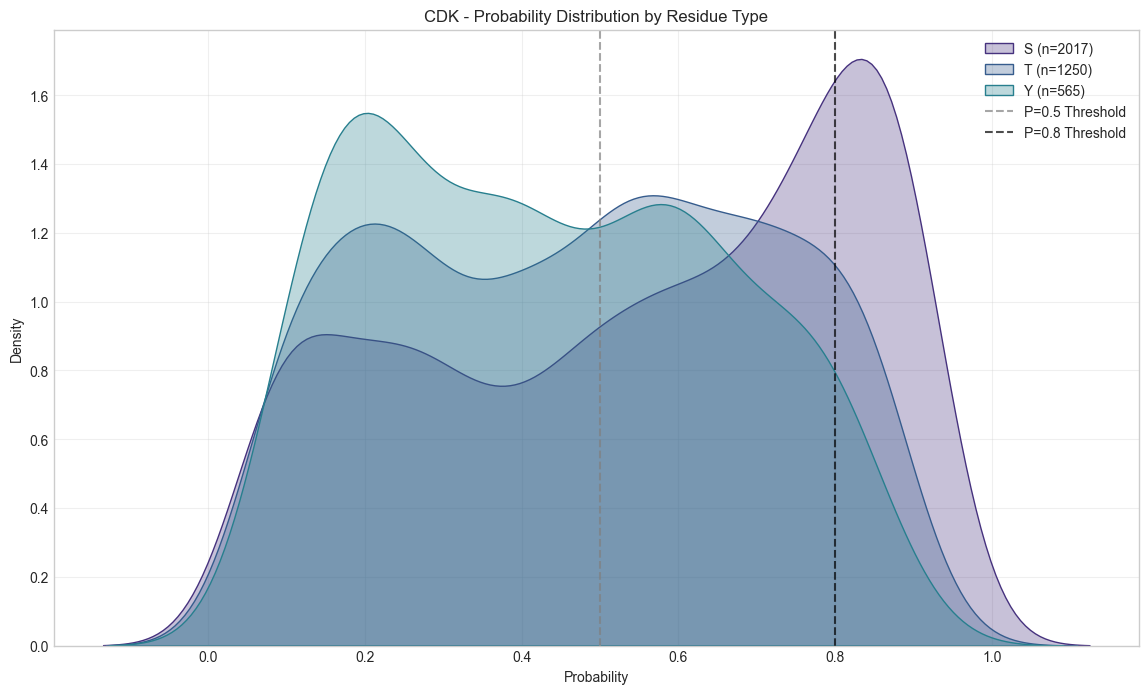

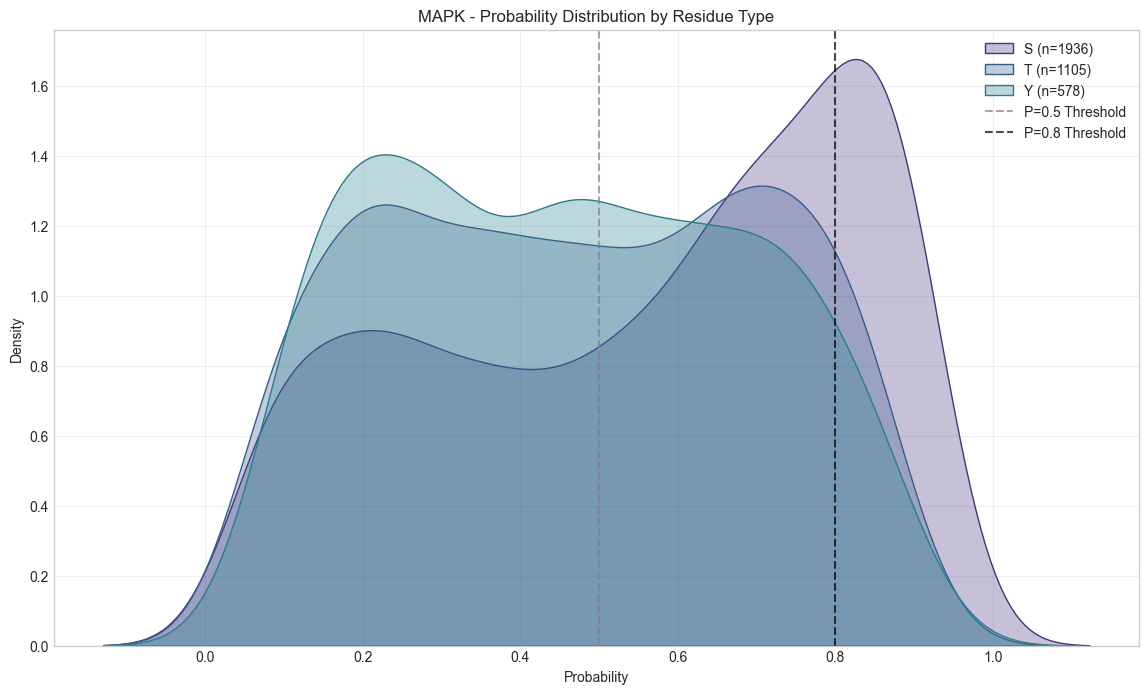


Context patterns for CDK:
context
-    3574
P     258
Name: count, dtype: int64

Phosphorylation rate by context for CDK:
         Total  Phosphorylated  Phosphorylation Rate
context                                             
P          258             148              0.573643
-         3574            1905              0.533016


C:\Users\justi\AppData\Local\Temp\ipykernel_26992\426898485.py:238: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_contexts, y=context_phospho_rates, palette='viridis')


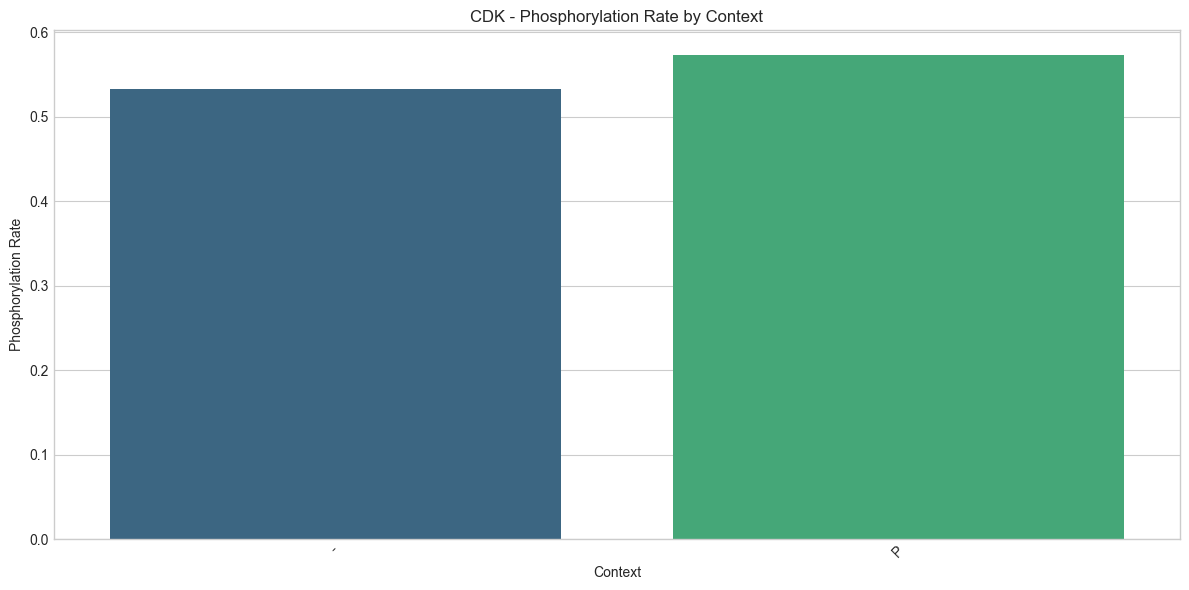

C:\Users\justi\AppData\Local\Temp\ipykernel_26992\426898485.py:258: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=residue_stats.index, y=residue_stats['Phosphorylation Rate'], palette='viridis')


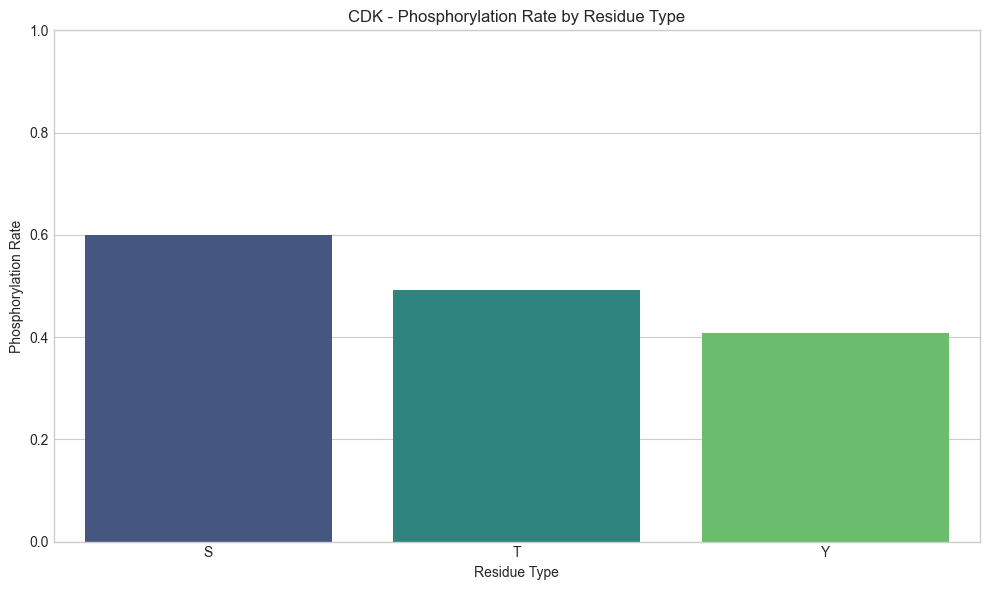


Context patterns for MAPK:
context
-    3303
P     316
Name: count, dtype: int64

Phosphorylation rate by context for MAPK:
         Total  Phosphorylated  Phosphorylation Rate
context                                             
P          316             208              0.658228
-         3303            1740              0.526794


C:\Users\justi\AppData\Local\Temp\ipykernel_26992\426898485.py:238: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_contexts, y=context_phospho_rates, palette='viridis')


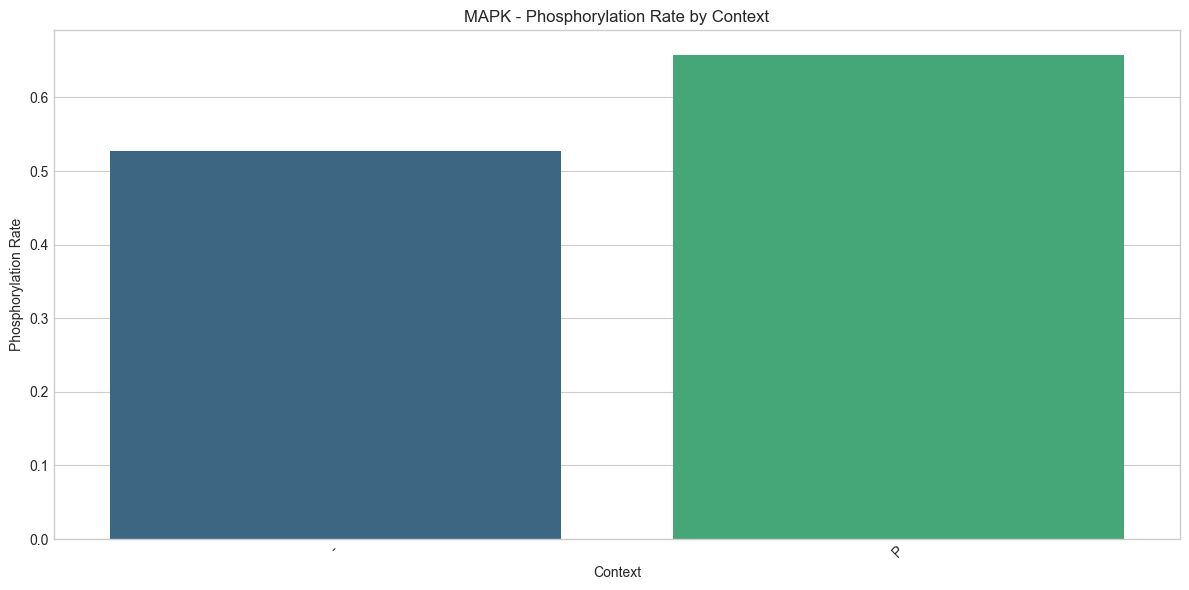

C:\Users\justi\AppData\Local\Temp\ipykernel_26992\426898485.py:258: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=residue_stats.index, y=residue_stats['Phosphorylation Rate'], palette='viridis')


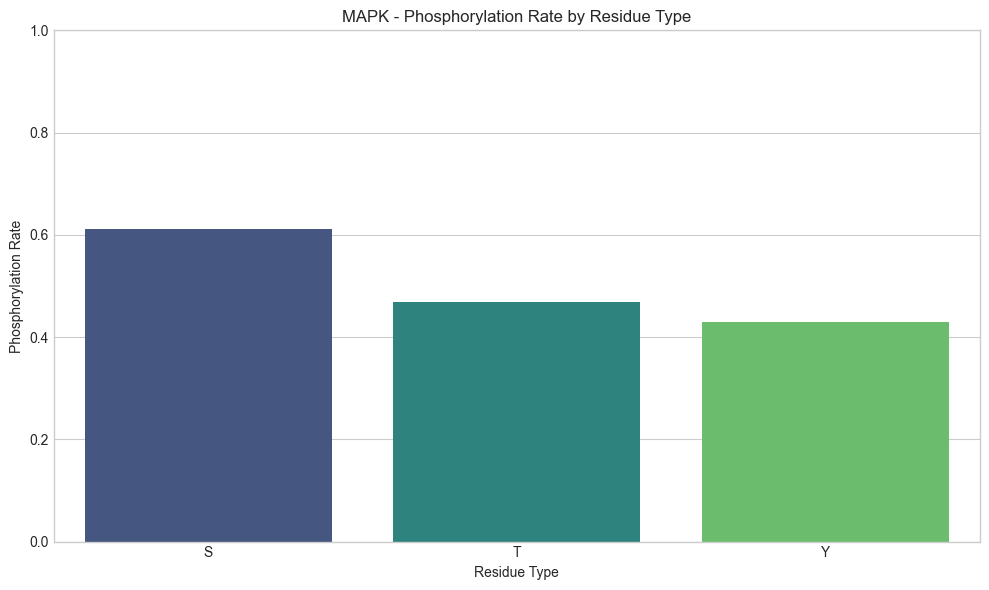

Created network for CDK with 515 nodes and 514 edges


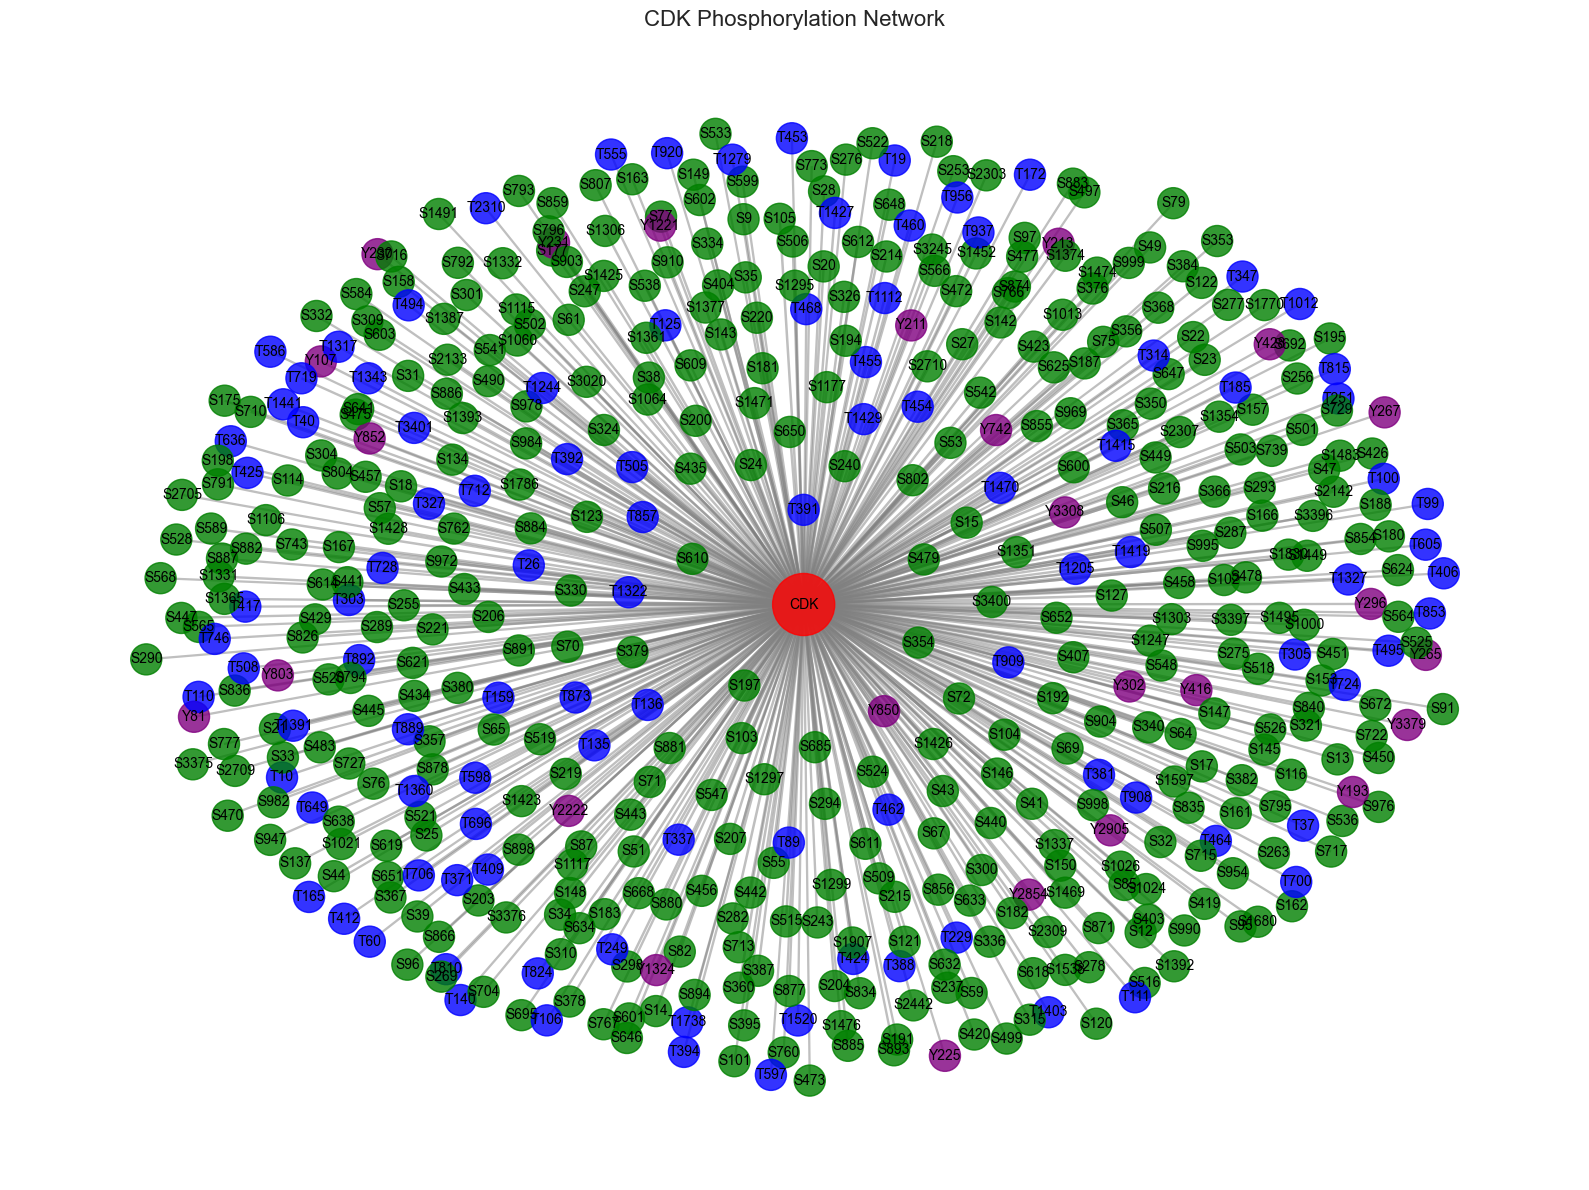

Network Metrics for CDK Phosphorylation Network:
  Nodes: 515
  Edges: 514
  Density: 0.003883495145631068
  Average Clustering: 0.0
  Connected Components: 1
High confidence sites by residue type:
  S: 387
  Y: 25
  T: 102
Created network for MAPK with 418 nodes and 417 edges


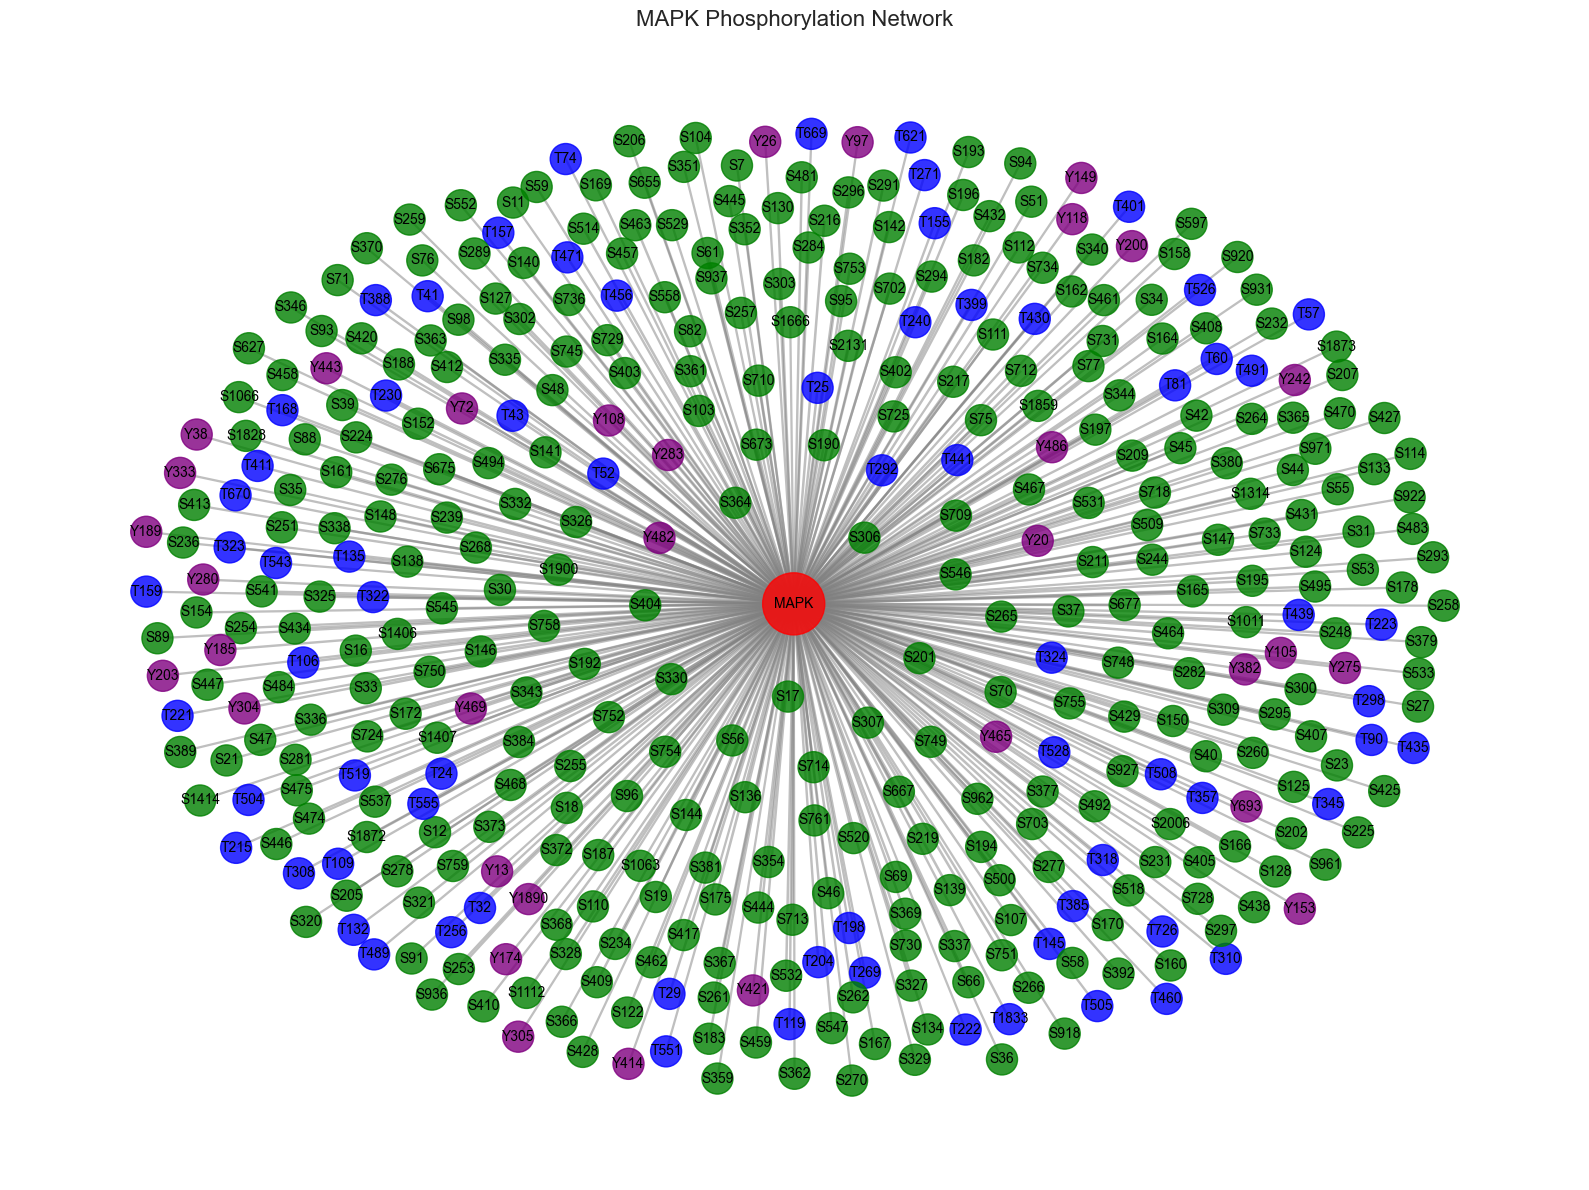

Network Metrics for MAPK Phosphorylation Network:
  Nodes: 418
  Edges: 417
  Density: 0.004784688995215311
  Average Clustering: 0.0
  Connected Components: 1
High confidence sites by residue type:
  S: 313
  T: 71
  Y: 33

Network Comparison:
     Nodes Edges   Density Average Clustering
CDK    515   514  0.003883                0.0
MAPK   418   417  0.004785                0.0


<Figure size 1200x600 with 0 Axes>

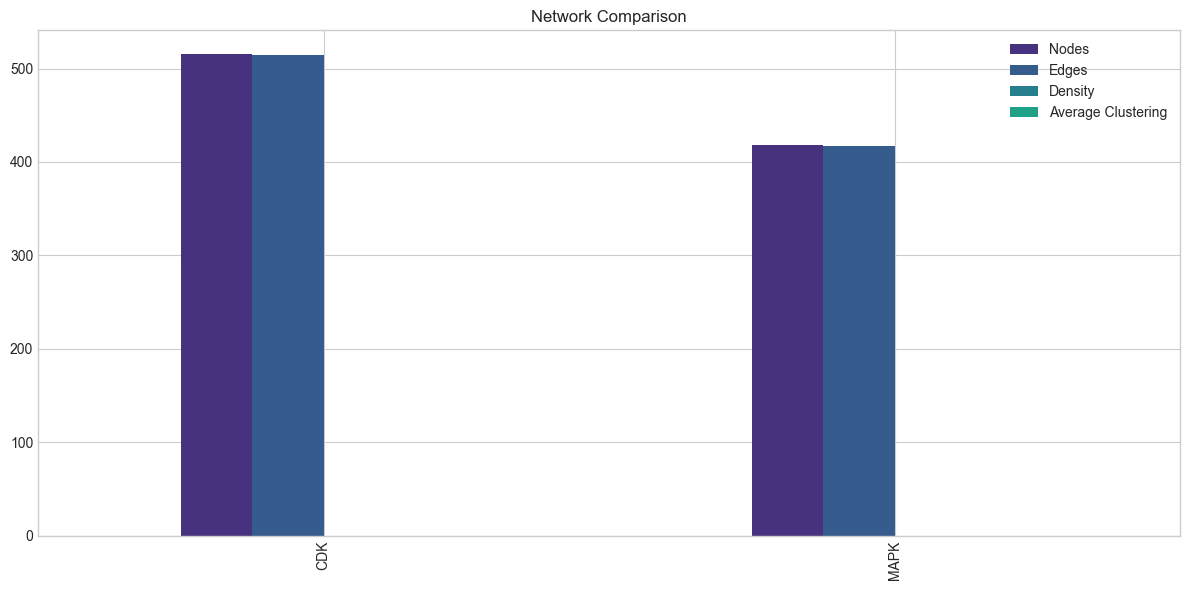

<Figure size 1000x600 with 0 Axes>

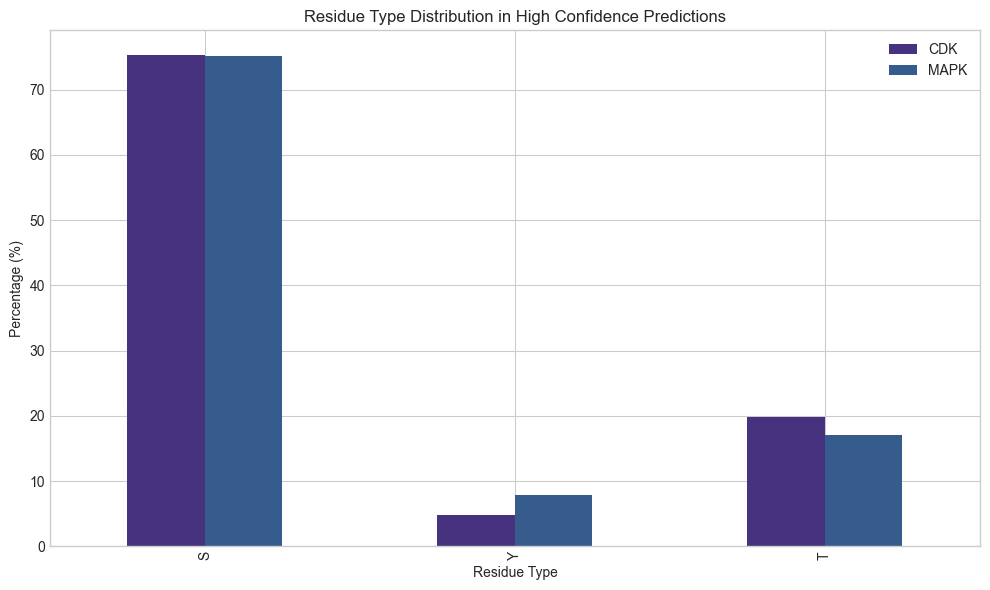

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter
import os
import re

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("viridis")

# Load and Prepare Data
def load_phosfor_results(file_path):
    """Load PHOSforUS result file with the correct format"""
    # Check if file exists
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return None
    
    # Load the file as text first to check the format and skip header lines
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    # Skip header lines 
    data_lines = []
    for line in lines:
        if line.startswith('####') or line.strip() == '':
            continue
        elif line.startswith('##'):
            continue  # Skip entry completion lines
        else:
            data_lines.append(line.strip())
    
    # Create a pandas DataFrame with the correct columns
    data = []
    for line in data_lines:
        parts = line.split()
        if len(parts) >= 5:  # Ensure there are at least 5 columns
            position = int(parts[0])
            residue_info = parts[1]
            prediction = parts[2]
            score = float(parts[3])
            probability = float(parts[4])
            data.append([position, residue_info, prediction, score, probability])
    
    # Create DataFrame with appropriate column names
    df = pd.DataFrame(data, columns=['position', 'residue_info', 'prediction', 'score', 'probability'])
    
    # Display basic information
    print(f"Loaded {file_path}")
    print(f"Number of records: {len(df)}")
    print(f"Data columns: {df.columns.tolist()}")
    
    return df

# Load the CDK and MAPK results
cdk_results = load_phosfor_results('C:/Users/justi/Documents/Python Files/CDKresults.txt')
mapk_results = load_phosfor_results('C:/Users/justi/Documents/Python Files/MAPKresults.txt')

# Display the first few rows of each dataset
print("\nCDK Results Preview:")
print(cdk_results.head())

print("\nMAPK Results Preview:")
print(mapk_results.head())

# Basic Data Analysis
def analyze_result_stats(results, kinase_name):
    """Calculate basic statistics for the results"""
    if results is None:
        return None
    
    # Calculate overall statistics
    stats = {
        'Total Sites': len(results),
        'Phosphorylated Sites': sum(results['prediction'] == 'PHOSPHO'),
        'Non-phosphorylated Sites': sum(results['prediction'] == 'NONPHOS'),
        'Phosphorylation Rate': sum(results['prediction'] == 'PHOSPHO') / len(results),
        'Mean Score': results['score'].mean(),
        'Mean Probability': results['probability'].mean(),
        'Min Probability': results['probability'].min(),
        'Max Probability': results['probability'].max()
    }
    
    # Extract residue types from residue_info column
    results['residue_type'] = results['residue_info'].str[0]
    
    # Count sites by residue type
    residue_counts = results['residue_type'].value_counts()
    for residue, count in residue_counts.items():
        stats[f'{residue} Sites'] = count
    
    # Count phosphorylated sites by residue type
    phospho_by_residue = results[results['prediction'] == 'PHOSPHO']['residue_type'].value_counts()
    for residue, count in phospho_by_residue.items():
        stats[f'{residue} Phosphorylated'] = count
        # Calculate phosphorylation rate for each residue type
        total_residue = residue_counts.get(residue, 0)
        if total_residue > 0:
            stats[f'{residue} Phosphorylation Rate'] = count / total_residue
    
    # Create a dataframe for the statistics
    stats_df = pd.DataFrame([stats], index=[kinase_name])
    
    return stats_df

# Analyze statistics for both datasets
cdk_stats = analyze_result_stats(cdk_results, 'CDK')
mapk_stats = analyze_result_stats(mapk_results, 'MAPK')

# Display statistics
print("\nCDK Statistics:")
print(cdk_stats)

print("\nMAPK Statistics:")
print(mapk_stats)

# Compare statistics side by side
if cdk_stats is not None and mapk_stats is not None:
    combined_stats = pd.concat([cdk_stats, mapk_stats])
    print("\nComparison of CDK and MAPK Statistics:")
    print(combined_stats)

# Distribution of Scores and Probabilities
def plot_score_distributions(results_list, labels):
    """Plot score and probability distributions"""
    if not all(r is not None for r in results_list):
        print("Cannot plot distributions - missing data")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot score distributions
    for i, (results, label) in enumerate(zip(results_list, labels)):
        # Score distribution
        sns.histplot(results['score'], kde=True, ax=axes[0, 0], 
                    color=f'C{i}', alpha=0.6, label=label)
        
        # Probability distribution
        sns.histplot(results['probability'], kde=True, ax=axes[0, 1],
                    color=f'C{i}', alpha=0.6, label=label)
        
        # Score by prediction
        sns.boxplot(x='prediction', y='score', data=results, ax=axes[1, 0],
                   palette='viridis')
        
        # Probability by prediction
        sns.boxplot(x='prediction', y='probability', data=results, ax=axes[1, 1],
                   palette='viridis')
    
    # Set titles and labels
    axes[0, 0].set_title('Distribution of Scores')
    axes[0, 0].set_xlabel('Score')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    
    axes[0, 1].set_title('Distribution of Probabilities')
    axes[0, 1].set_xlabel('Probability')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].legend()
    
    axes[1, 0].set_title('Scores by Prediction Type')
    axes[1, 0].set_xlabel('Prediction')
    axes[1, 0].set_ylabel('Score')
    
    axes[1, 1].set_title('Probabilities by Prediction Type')
    axes[1, 1].set_xlabel('Prediction')
    axes[1, 1].set_ylabel('Probability')
    
    plt.tight_layout()
    plt.show()
    
    # Plot probability distribution for each residue type
    for results, label in zip(results_list, labels):
        plt.figure(figsize=(14, 8))
        residue_types = results['residue_type'].unique()
        
        for i, residue in enumerate(sorted(residue_types)):
            subset = results[results['residue_type'] == residue]
            if len(subset) > 5:  # Only plot if enough data points
                sns.kdeplot(subset['probability'], label=f'{residue} (n={len(subset)})', 
                           fill=True, alpha=0.3)
        
        plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.7, label='P=0.5 Threshold')
        plt.axvline(x=0.8, color='black', linestyle='--', alpha=0.7, label='P=0.8 Threshold')
        
        plt.title(f'{label} - Probability Distribution by Residue Type')
        plt.xlabel('Probability')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

# Plot score and probability distributions
plot_score_distributions([cdk_results, mapk_results], ['CDK', 'MAPK'])

# Analyze Residue Context and Motifs
def extract_sequence_context(results, kinase_name):
    """Extract sequence context information from residue_info column"""
    if results is None:
        return
    
    # Extract residue type and context information
    # The residue_info appears to be like "S-", "TP", "SP", etc.
    # where the first character is the residue type and the rest is context
    results['residue_type'] = results['residue_info'].str[0]
    results['context'] = results['residue_info'].str[1:]
    
    # Analyze context patterns
    context_patterns = results['context'].value_counts()
    
    print(f"\nContext patterns for {kinase_name}:")
    print(context_patterns.head(10))
    
    # Count phosphorylation by context
    phospho_by_context = results[results['prediction'] == 'PHOSPHO'].groupby('context').size()
    total_by_context = results.groupby('context').size()
    
    context_stats = pd.DataFrame({
        'Total': total_by_context,
        'Phosphorylated': phospho_by_context,
    })
    
    context_stats['Phosphorylation Rate'] = context_stats['Phosphorylated'] / context_stats['Total']
    context_stats = context_stats.sort_values('Phosphorylation Rate', ascending=False)
    
    print(f"\nPhosphorylation rate by context for {kinase_name}:")
    print(context_stats.head(10))
    
    # Plot the most common contexts
    plt.figure(figsize=(12, 6))
    top_contexts = context_patterns.head(10).index
    context_phospho_rates = context_stats.loc[top_contexts, 'Phosphorylation Rate']
    
    sns.barplot(x=top_contexts, y=context_phospho_rates, palette='viridis')
    plt.title(f'{kinase_name} - Phosphorylation Rate by Context')
    plt.xlabel('Context')
    plt.ylabel('Phosphorylation Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Analysis of residue type correlation with phosphorylation
    phospho_by_residue = results[results['prediction'] == 'PHOSPHO']['residue_type'].value_counts()
    total_by_residue = results['residue_type'].value_counts()
    
    residue_stats = pd.DataFrame({
        'Total': total_by_residue,
        'Phosphorylated': phospho_by_residue,
    })
    
    residue_stats['Phosphorylation Rate'] = residue_stats['Phosphorylated'] / residue_stats['Total']
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=residue_stats.index, y=residue_stats['Phosphorylation Rate'], palette='viridis')
    plt.title(f'{kinase_name} - Phosphorylation Rate by Residue Type')
    plt.xlabel('Residue Type')
    plt.ylabel('Phosphorylation Rate')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()
    
    return residue_stats

# Analyze residue context for both datasets
cdk_residue_stats = extract_sequence_context(cdk_results, 'CDK')
mapk_residue_stats = extract_sequence_context(mapk_results, 'MAPK')

# Network Analysis
def create_protein_network(results, kinase_name, confidence_threshold=0.8):
    """Create a network from phosphorylation predictions"""
    if results is None:
        return None
    
    # Create an empty graph
    G = nx.Graph()
    
    # Add kinase as central node
    G.add_node(kinase_name, node_type='kinase', size=2000, color='red')
    
    # Filter high confidence predictions
    high_conf = results[results['probability'] >= confidence_threshold]
    
    # Add substrate nodes and edges
    for _, row in high_conf.iterrows():
        # Create substrate node ID based on position
        substrate_id = f"Site_{row['position']}"
        site_type = f"{row['residue_type']}{row['position']}"
        
        # Add substrate node
        G.add_node(substrate_id, node_type='site', size=500, 
                  residue=row['residue_type'], position=row['position'],
                  color='green' if row['residue_type'] == 'S' else 
                        'blue' if row['residue_type'] == 'T' else 'purple')
        
        # Add edge from kinase to substrate
        G.add_edge(kinase_name, substrate_id, weight=row['probability'], score=row['score'])
    
    print(f"Created network for {kinase_name} with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
    return G

def visualize_network(G, title):
    """Visualize a protein phosphorylation network"""
    if G is None:
        return
    
    plt.figure(figsize=(16, 12))
    
    # Define node positions using spring layout
    pos = nx.spring_layout(G, k=0.3, iterations=50, seed=42)
    
    # Get node attributes
    node_types = nx.get_node_attributes(G, 'node_type')
    node_sizes = [G.nodes[n].get('size', 300) for n in G.nodes()]
    node_colors = [G.nodes[n].get('color', 'blue') for n in G.nodes()]
    
    # Draw the network
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
    
    # Draw edges with weights determining width
    edge_weights = [G[u][v].get('weight', 1.0)*2 for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5, edge_color='gray')
    
    # Add labels for kinase and site nodes
    labels = {}
    for n in G.nodes():
        if node_types.get(n) == 'kinase':
            labels[n] = n
        elif node_types.get(n) == 'site':
            residue = G.nodes[n].get('residue', '')
            position = G.nodes[n].get('position', '')
            labels[n] = f"{residue}{position}"
    
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)
    
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Calculate and display network metrics
    metrics = {
        'Nodes': G.number_of_nodes(),
        'Edges': G.number_of_edges(),
        'Density': nx.density(G),
        'Average Clustering': nx.average_clustering(G),
        'Connected Components': nx.number_connected_components(G),
    }
    
    print(f"Network Metrics for {title}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    
    # Count high confidence sites by residue type
    residue_counts = {}
    for n, data in G.nodes(data=True):
        if data.get('node_type') == 'site':
            residue = data.get('residue', '')
            if residue in residue_counts:
                residue_counts[residue] += 1
            else:
                residue_counts[residue] = 1
    
    print(f"High confidence sites by residue type:")
    for residue, count in residue_counts.items():
        print(f"  {residue}: {count}")

# Create and visualize networks
cdk_network = create_protein_network(cdk_results, 'CDK')
visualize_network(cdk_network, 'CDK Phosphorylation Network')

mapk_network = create_protein_network(mapk_results, 'MAPK')
visualize_network(mapk_network, 'MAPK Phosphorylation Network')

# Compare Networks
def compare_networks(networks, names):
    """Compare multiple phosphorylation networks"""
    if not all(networks):
        print("Cannot compare networks - one or more networks are missing")
        return
    
    # Collect metrics for comparison
    metrics = ['Nodes', 'Edges', 'Density', 'Average Clustering']
    comparison = pd.DataFrame(index=names, columns=metrics)
    
    for i, G in enumerate(networks):
        name = names[i]
        comparison.loc[name, 'Nodes'] = G.number_of_nodes()
        comparison.loc[name, 'Edges'] = G.number_of_edges()
        comparison.loc[name, 'Density'] = nx.density(G)
        comparison.loc[name, 'Average Clustering'] = nx.average_clustering(G)
    
    # Display comparison table
    print("\nNetwork Comparison:")
    print(comparison)
    
    # Visualize comparison
    plt.figure(figsize=(12, 6))
    comparison.plot(kind='bar', figsize=(12, 6))
    plt.title('Network Comparison')
    plt.tight_layout()
    plt.show()
    
    # Compare residue type distribution in high confidence predictions
    residue_distributions = {}
    
    for i, G in enumerate(networks):
        name = names[i]
        residue_counts = {}
        
        for n, data in G.nodes(data=True):
            if data.get('node_type') == 'site':
                residue = data.get('residue', '')
                if residue in residue_counts:
                    residue_counts[residue] += 1
                else:
                    residue_counts[residue] = 1
        
        residue_distributions[name] = residue_counts
    
    # Create a DataFrame for residue distribution
    residue_df = pd.DataFrame(residue_distributions)
    residue_df = residue_df.fillna(0)
    
    # Convert to percentage
    for col in residue_df.columns:
        residue_df[col] = residue_df[col] / residue_df[col].sum() * 100
    
    # Plot residue distribution
    plt.figure(figsize=(10, 6))
    residue_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Residue Type Distribution in High Confidence Predictions')
    plt.xlabel('Residue Type')
    plt.ylabel('Percentage (%)')
    plt.tight_layout()
    plt.show()

# Compare networks
compare_networks([cdk_network, mapk_network], ['CDK', 'MAPK'])

# Analyze Feature Types
def categorize_features(results):
    """
    Categorize biophysical features into:
    - Horizontal features: across sequences or between neighboring residues
    - Vertical features: properties of individual amino acids
    """
    # Extract context information
    results['context'] = results['residue_info'].str[1:]
    
    # Horizontal Analysis: Context patterns (neighboring residues)
    horizontal_analysis = {}
    
    # Analyze different contexts and their impact on phosphorylation
    contexts = results['context'].unique()
    for context in contexts:
        subset = results[results['context'] == context]
        phospho_rate = sum(subset['prediction'] == 'PHOSPHO') / len(subset) if len(subset) > 0 else 0
        horizontal_analysis[context] = {
            'count': len(subset),
            'phospho_count': sum(subset['prediction'] == 'PHOSPHO'),
            'phospho_rate': phospho_rate,
            'avg_probability': subset['probability'].mean() if len(subset) > 0 else 0
        }
    
    # Vertical Analysis: Residue type properties
    vertical_analysis = {}
    
    # Analyze different residue types and their impact on phosphorylation
    residue_types = results['residue_type'].unique()
    for residue in residue_types:
        subset = results[results['residue_type'] == residue]
        phospho_rate = sum(subset['prediction'] == 'PHOSPHO') / len(subset) if len(subset) > 0 else 0
        vertical_analysis[residue] = {
            'count': len(subset),
            'phospho_count': sum(subset['prediction'] == 'PHOSPHO'),
            'phospho_rate': phospho_rate,
            'avg_probability': subset['probability'].mean() if len(subset) > 0 else 0
        }
    
    return {
        'horizontal': horizontal_analysis,
        'vertical': vertical_analysis
    }

def compare_feature_types(cdk_results, mapk_results):
    """Compare the importance of horizontal vs vertical features between kinases"""
    # Categorize features for each kinase
    cdk_features = categorize_features(cdk_results)
    mapk_features = categorize_features(mapk_results)
    
    # Compare horizontal features (context patterns)
    print("\n=== Horizontal Features Comparison (Context Patterns) ===")
    
    # Find common contexts
    common_contexts = set(cdk_features['horizontal'].keys()) & set(mapk_features['horizontal'].keys())
    
    if common_contexts:
        common_data = []
        for context in common_contexts:
            cdk_data = cdk_features['horizontal'][context]
            mapk_data = mapk_features['horizontal'][context]
            
            if cdk_data['count'] >= 5 and mapk_data['count'] >= 5:  # Only compare contexts with sufficient data
                common_data.append({
                    'Context': context,
                    'CDK_phospho_rate': cdk_data['phospho_rate'],
                    'MAPK_phospho_rate': mapk_data['phospho_rate'],
                    'Difference': cdk_data['phospho_rate'] - mapk_data['phospho_rate'],
                    'CDK_count': cdk_data['count'],
                    'MAPK_count': mapk_data['count']
                })
        
        if common_data:
            df_horizontal = pd.DataFrame(common_data)
            df_horizontal = df_horizontal.sort_values('Difference', ascending=False)
            
            print("Contexts with biggest difference in phosphorylation rate between CDK and MAPK:")
            print(df_horizontal.head(10))
            
            # Plot horizontal feature comparison
            plt.figure(figsize=(14, 7))
            
            # Select top contexts with biggest differences
            top_contexts = df_horizontal.head(10)['Context'].tolist()
            
            # Create plot data
            plot_data = []
            for context in top_contexts:
                plot_data.append({
                    'Context': context,
                    'Kinase': 'CDK',
                    'Phosphorylation Rate': cdk_features['horizontal'][context]['phospho_rate']
                })
                plot_data.append({
                    'Context': context,
                    'Kinase': 'MAPK',
                    'Phosphorylation Rate': mapk_features['horizontal'][context]['phospho_rate']
                })
            
            plot_df = pd.DataFrame(plot_data)
            
            # Create bar plot
            sns.barplot(x='Context', y='Phosphorylation Rate', hue='Kinase', data=plot_df)
            plt.title('Comparison of Horizontal Features (Context) Impact on Phosphorylation')
            plt.xlabel('Context')
            plt.ylabel('Phosphorylation Rate')
            plt.legend(title='Kinase')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
    
    # Compare vertical features (residue types)
    print("\n=== Vertical Features Comparison (Residue Types) ===")
    
    # Create comparison dataframe
    vertical_data = []
    for residue in set(cdk_features['vertical'].keys()) | set(mapk_features['vertical'].keys()):
        cdk_data = cdk_features['vertical'].get(residue, {'phospho_rate': 0, 'count': 0})
        mapk_data = mapk_features['vertical'].get(residue, {'phospho_rate': 0, 'count': 0})
        
        vertical_data.append({
            'Residue': residue,
            'CDK_phospho_rate': cdk_data['phospho_rate'],
            'MAPK_phospho_rate': mapk_data['phospho_rate'],
            'Difference': cdk_data['phospho_rate'] - mapk_data['phospho_rate'] if residue in cdk_features['vertical'] and residue in mapk_features['vertical'] else np.nan,
            'CDK_count': cdk_data['count'],
            'MAPK_count': mapk_data['count']
        })
    
    df_vertical = pd.DataFrame(vertical_data)
    df_vertical = df_vertical.sort_values('Difference', ascending=False)
    
    print("Residue types with differences in phosphorylation rate between CDK and MAPK:")
    print(df_vertical)
    
    # Plot vertical feature comparison
    plt.figure(figsize=(10, 6))
    
    # Create plot data
    plot_data = []
    for residue in df_vertical['Residue']:
        if residue in cdk_features['vertical']:
            plot_data.append({
                'Residue': residue,
                'Kinase': 'CDK',
                'Phosphorylation Rate': cdk_features['vertical'][residue]['phospho_rate']
            })
        if residue in mapk_features['vertical']:
            plot_data.append({
                'Residue': residue,
                'Kinase': 'MAPK',
                'Phosphorylation Rate': mapk_features['vertical'][residue]['phospho_rate']
            })
    
    plot_df = pd.DataFrame(plot_data)
    
    # Create bar plot
    sns.barplot(x='Residue', y='Phosphorylation Rate', hue='Kinase', data=plot_df)
    plt.title('Comparison of Vertical Features (Residue Type) Impact on Phosphorylation')
    plt.xlabel('Residue Type')
    plt.ylabel('Phosphorylation Rate')
    plt.legend(title='Kinase')
    plt.tight_layout()
    plt.show()
    
    # Summary of feature importance
    print("\n=== Summary of Feature Importance ===")
    
    # Calculate variation in horizontal vs vertical features
    horizontal_variation_cdk = np.std([data['phospho_rate'] for data in cdk_features['horizontal'].values() if data['count'] >= 5])
    horizontal_variation_mapk = np.std([data['phospho_rate'] for data in mapk_features['horizontal'].values() if data['count'] >= 5])
    
    vertical_variation_cdk = np.std([data['phospho_rate'] for data in cdk_features['vertical'].values() if data['count'] >= 5])
    vertical_variation_mapk = np.std([data['phospho_rate'] for data in mapk_features['vertical'].values() if data['count'] >= 5])
    
    # Create comparison table
    summary_data = [
        {'Kinase': 'CDK', 'Horizontal Variation': horizontal_variation_cdk, 'Vertical Variation': vertical_variation_cdk, 'H/V Ratio': horizontal_variation_cdk/vertical_variation_cdk if vertical_variation_cdk > 0 else np.nan},
        {'Kinase': 'MAPK', 'Horizontal Variation': horizontal_variation_mapk, 'Vertical Variation': vertical_variation_mapk, 'H/V Ratio': horizontal_variation_mapk/vertical_variation_mapk if vertical_variation_mapk > 0 else np.nan}
    ]
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df)
    
    # Plot feature importance comparison
    plt.figure(figsize=(10, 6))
    
    x = ['CDK', 'MAPK']
    horizontal_vars = [horizontal_variation_cdk, horizontal_variation_mapk]
    vertical_vars = [vertical_variation_cdk, vertical_variation_mapk]
    
    width = 0.35
    x_pos = np.arange(len(x))
    
    plt.bar(x_pos - width/2, horizontal_vars, width, label='Horizontal Variation')
    plt.bar(x_pos + width/2, vertical_vars, width, label='Vertical Variation')
    
    plt.xlabel('Kinase')
    plt.ylabel('Variation in Phosphorylation Rate')
    plt.title('Importance of Horizontal vs Vertical Features')
    plt.xticks(x_pos, x)
    plt.legend()